# Ch. 10 – Perceptual

## Figure 10.4 Auditory nerve fibre model and inner hair cells spiking for the earlier example (a complex tone consisting of 400 + 600 + 1600 Hz sine waves).

For more information, see [Brian
documentation](https://brian.readthedocs.io/en/stable/).

### Libraries

In [1]:
from brian2 import *
from brian2hears import *
import matplotlib.pyplot as plt

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.03s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]

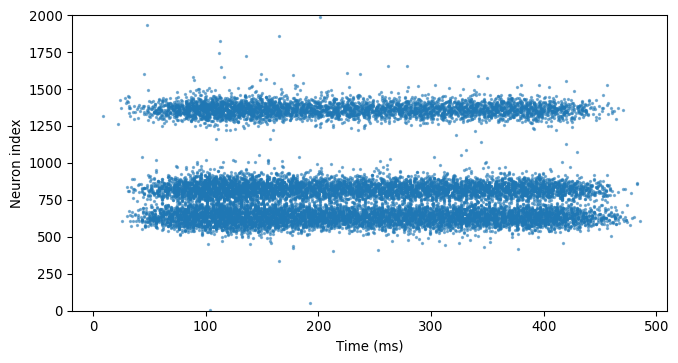

In [2]:
sound = loadsound('data/400_600_1600_hz.wav')

# Inner hair cell model
cfmin, cfmax, cfN = 20*Hz, 20*kHz, 3000 # was 3000
cf = erbspace(cfmin, cfmax, cfN)
gfb = Gammatone(sound, cf)
ihc = FunctionFilterbank(gfb, lambda x: 3*clip(x, 0, Inf)**(1.0/3.0))
# Leaky integrate-and-fire model with noise and refractoriness
eqs = '''
dv/dt = (I-v)/(1*ms)+0.2*xi*(2/(1*ms))**.5 : 1 (unless refractory)
I : 1
'''
G = FilterbankGroup(ihc, 'I', eqs, reset='v=0', threshold='v>1', refractory=5*ms)
# Run, and raster plot of the spikes
M = SpikeMonitor(G)
run(sound.duration)

# Plot the results
fig, ax = plt.subplots(figsize=(8.0, 4.0))
ax.plot(M.t/ms, M.i, '.', alpha=0.5, color='tab:blue', ms=3)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron number (inner hair cell)')
ylim(0, 2000)
xlabel('Time (ms)')
ylabel('Neuron index');
plt.show()